# 1. Import and Install Dependencies

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [2]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [4]:
def draw_landmarks(image, results):
#     mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
#     mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [5]:
def draw_styled_landmarks(image, results):
    # Draw face connections
#     mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
#                              mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
#                              mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
#                              ) 
    # Draw pose connections
#     mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
#                              mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
#                              mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
#                              ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [6]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [48]:
results

mediapipe.python.solution_base.SolutionOutputs

In [21]:
draw_landmarks(frame, results)

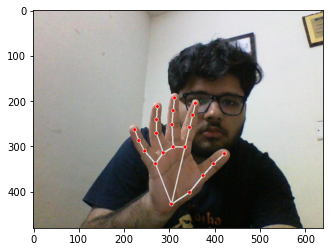

In [22]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [6]:
len(results.right_hand_landmarks.landmark)

NameError: name 'results' is not defined

In [7]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [8]:
# pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
# face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [8]:
# face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() 
#     if results.face_landmarks 
#     else np.zeros(1404)


In [6]:
def extract_keypoints(results):
#     pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
#     face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([lh, rh])
#     return np.concatenate([pose, lh, rh])

In [10]:
result_test = extract_keypoints(results)

In [50]:
result_test

array([ 7.74524093e-01,  8.33451450e-01,  3.03776858e-07,  7.04906881e-01,
        8.14141929e-01, -3.15992571e-02,  6.48984492e-01,  7.45689154e-01,
       -4.63447385e-02,  6.17902756e-01,  6.74207389e-01, -5.76915517e-02,
        5.90536356e-01,  6.13965034e-01, -6.72264025e-02,  6.67660296e-01,
        6.04040205e-01, -2.15141270e-02,  6.45320594e-01,  5.10839164e-01,
       -3.92192788e-02,  6.34442389e-01,  4.52853888e-01, -5.65399937e-02,
        6.25219285e-01,  4.02629882e-01, -7.03888834e-02,  7.15910196e-01,
        5.84646523e-01, -2.19980013e-02,  7.02585757e-01,  4.79016483e-01,
       -3.44040804e-02,  6.95315897e-01,  4.14222240e-01, -4.91545759e-02,
        6.84876621e-01,  3.62991273e-01, -6.11496195e-02,  7.62976348e-01,
        5.92982650e-01, -2.70106811e-02,  7.65101552e-01,  4.97022152e-01,
       -4.25308868e-02,  7.63105512e-01,  4.36766446e-01, -5.69517016e-02,
        7.55772352e-01,  3.84454250e-01, -6.80737272e-02,  8.09035778e-01,
        6.21742189e-01, -

In [36]:
np.save('0', result_test)

In [37]:
np.load('0.npy')

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

# 4. Setup Folders for Collection

In [12]:
path = os.getcwd()

In [13]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join(path, 'MP_Data') 

# Actions that we try to detect
actions = np.array(['0', '1', '2'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 1

In [11]:
actions = np.array(['0','1','2'])

In [15]:
DATA_PATH

'C:\\Users\\VG\\OneDrive - iitr.ac.in\\Documents\\Anushruti\\Holistic Gesture\\ActionDetectionforSignLanguage-main\\MP_Data'

In [98]:
for action in actions: 
    try:
        os.makedirs(os.path.join(DATA_PATH, action))
    except:
        pass
    try:
        dirmax = np.max(np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int))
    except:
        dirmax = 0
    for sequence in range(1,no_sequences+1):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(dirmax+sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [99]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
#     for action in actions:
    action = '2'
    # Loop through sequences aka videos
    for sequence in range(start_folder, start_folder+no_sequences):
        # Loop through video length aka sequence length
        for frame_num in range(sequence_length+1):

            # Read feed
            ret, frame = cap.read()

            # Make detections
            image, results = mediapipe_detection(frame, holistic)

            # Draw landmarks
            draw_styled_landmarks(image, results)

            # NEW Apply wait logic
            if frame_num == 0: 
#                 cv2.waitKey(4000)
                cv2.putText(image, 'Press p to start', (120,200), 
                           cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                # Show to screen
                cv2.imshow('OpenCV Feed', image)
                if cv2.waitKey(10) & 0xFF != ord('p'):
                    cv2.waitKey(-1)
                cv2.putText(image, 'Starting', (120,300), 
                           cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                cv2.imshow('OpenCV Feed', image)
                cv2.waitKey(2000)
                
            elif frame_num == sequence_length-1:
                cv2.putText(image, 'Video Completed', (120,200), 
                           cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 2, cv2.LINE_AA)
                cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                # Show to screen
                cv2.imshow('OpenCV Feed', image)
                cv2.waitKey(800)

                

            else: 
                cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                # Show to screen
                cv2.imshow('OpenCV Feed', image)

            # NEW Export keypoints
            if frame_num != 0:
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num-1))
                np.save(npy_path, keypoints)

            # Break gracefully
            if cv2.waitKey(10) & 0xFF == ord('q'):
                break
                    
    cap.release()
    cv2.destroyAllWindows()

In [12]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [16]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [17]:
label_map = {label:num for num, label in enumerate(actions)}

In [18]:
label_map

{'0': 0, '1': 1, '2': 2}

In [19]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [20]:
np.array(sequences).shape

(90, 30, 126)

In [21]:
np.array(labels).shape

(90,)

In [22]:
X = np.array(sequences)

In [23]:
X.shape

(90, 30, 126)

In [24]:
y = to_categorical(labels).astype(int)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [26]:
y_test.shape

(5, 3)

# 7. Build and Train LSTM Neural Network

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import TensorBoard

In [9]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [12]:
from tensorflow import keras
from tensorflow.keras import layers
input_shape=(30,126)

def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Normalization and Attention
    x = layers.LayerNormalization(epsilon=1e-6)(inputs)
    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(x, x)
    x = layers.Dropout(dropout)(x)
    res = x + inputs

    # Feed Forward Part
    x = layers.LayerNormalization(epsilon=1e-6)(res)
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    return x + res

# print(actions.shape[0])

def build_model(
    input_shape,
    head_size,
    num_heads,
    ff_dim,
    num_transformer_blocks,
    mlp_units,
    dropout=0,
    mlp_dropout=0,
):
    inputs = keras.Input(shape=input_shape)
    x = inputs
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = layers.GlobalAveragePooling1D(data_format="channels_first")(x)
    for dim in mlp_units:
        x = layers.Dense(dim, activation="relu")(x)
        x = layers.Dropout(mlp_dropout)(x)
    outputs = layers.Dense(actions.shape[0], activation="softmax")(x)
    return keras.Model(inputs, outputs)


model = build_model(
    input_shape,
    head_size=256,
    num_heads=4,
    ff_dim=4,
    num_transformer_blocks=4,
    mlp_units=[128],
    mlp_dropout=0.4,
    dropout=0.25,
)

model.compile(
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    metrics=['categorical_accuracy']
)
model.summary()

callbacks = [keras.callbacks.EarlyStopping(patience=50, restore_best_weights=True)]



Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 30, 126)]    0           []                               
                                                                                                  
 layer_normalization_8 (LayerNo  (None, 30, 126)     252         ['input_2[0][0]']                
 rmalization)                                                                                     
                                                                                                  
 multi_head_attention_4 (MultiH  (None, 30, 126)     519294      ['layer_normalization_8[0][0]',  
 eadAttention)                                                    'layer_normalization_8[0][0]']  
                                                                                              

In [52]:
model.fit(
    X_train,
    y_train,
    epochs=600,
    callbacks=callbacks
)

Epoch 1/600
3/3 [==============================] - 17s 450ms/step - loss: 1.0924 - categorical_accuracy: 0.3059
Epoch 2/600
3/3 [==============================] - 1s 407ms/step - loss: 1.0948 - categorical_accuracy: 0.2941
Epoch 3/600
3/3 [==============================] - 1s 435ms/step - loss: 1.0877 - categorical_accuracy: 0.4000
Epoch 4/600
3/3 [==============================] - 1s 442ms/step - loss: 1.0806 - categorical_accuracy: 0.4471
Epoch 5/600
3/3 [==============================] - 2s 509ms/step - loss: 1.0772 - categorical_accuracy: 0.3882
Epoch 6/600
3/3 [==============================] - 2s 511ms/step - loss: 1.0841 - categorical_accuracy: 0.4471
Epoch 7/600
3/3 [==============================] - 2s 503ms/step - loss: 1.0680 - categorical_accuracy: 0.4118
Epoch 8/600
3/3 [==============================] - 2s 510ms/step - loss: 1.0553 - categorical_accuracy: 0.3765
Epoch 9/600
3/3 [==============================] - 2s 566ms/step - loss: 1.0313 - categorical_accuracy: 0.4824


Epoch 25/600
3/3 [==============================] - 1s 407ms/step - loss: 0.5955 - categorical_accuracy: 0.6471
Epoch 26/600
3/3 [==============================] - 1s 378ms/step - loss: 0.5221 - categorical_accuracy: 0.6706
Epoch 27/600
3/3 [==============================] - 1s 377ms/step - loss: 0.5084 - categorical_accuracy: 0.6588
Epoch 28/600
3/3 [==============================] - 1s 366ms/step - loss: 0.5355 - categorical_accuracy: 0.6824
Epoch 29/600
3/3 [==============================] - 1s 371ms/step - loss: 0.4915 - categorical_accuracy: 0.6588
Epoch 30/600
3/3 [==============================] - 1s 386ms/step - loss: 0.4766 - categorical_accuracy: 0.6824
Epoch 31/600
3/3 [==============================] - 1s 384ms/step - loss: 0.4741 - categorical_accuracy: 0.6706
Epoch 32/600
3/3 [==============================] - 1s 453ms/step - loss: 0.4518 - categorical_accuracy: 0.7059
Epoch 33/600
3/3 [==============================] - 1s 452ms/step - loss: 0.4361 - categorical_accuracy:

Epoch 49/600
3/3 [==============================] - 1s 409ms/step - loss: 0.3958 - categorical_accuracy: 0.6824
Epoch 50/600
3/3 [==============================] - 1s 368ms/step - loss: 0.3821 - categorical_accuracy: 0.7294
Epoch 51/600
3/3 [==============================] - 1s 365ms/step - loss: 0.3900 - categorical_accuracy: 0.7294
Epoch 52/600
3/3 [==============================] - 1s 368ms/step - loss: 0.3824 - categorical_accuracy: 0.7294
Epoch 53/600
3/3 [==============================] - 1s 377ms/step - loss: 0.3836 - categorical_accuracy: 0.7176
Epoch 54/600
3/3 [==============================] - 1s 356ms/step - loss: 0.3837 - categorical_accuracy: 0.7176
Epoch 55/600
3/3 [==============================] - 1s 368ms/step - loss: 0.3937 - categorical_accuracy: 0.6824
Epoch 56/600
3/3 [==============================] - 1s 375ms/step - loss: 0.3881 - categorical_accuracy: 0.7765
Epoch 57/600
3/3 [==============================] - 1s 371ms/step - loss: 0.3771 - categorical_accuracy:

Epoch 73/600
3/3 [==============================] - 1s 423ms/step - loss: 0.3677 - categorical_accuracy: 0.8000
Epoch 74/600
3/3 [==============================] - 1s 389ms/step - loss: 0.3716 - categorical_accuracy: 0.8000
Epoch 75/600
3/3 [==============================] - 1s 398ms/step - loss: 0.3640 - categorical_accuracy: 0.8235
Epoch 76/600
3/3 [==============================] - 1s 369ms/step - loss: 0.3612 - categorical_accuracy: 0.8353
Epoch 77/600
3/3 [==============================] - 1s 364ms/step - loss: 0.3654 - categorical_accuracy: 0.7765
Epoch 78/600
3/3 [==============================] - 1s 408ms/step - loss: 0.3563 - categorical_accuracy: 0.8824
Epoch 79/600
3/3 [==============================] - 1s 380ms/step - loss: 0.3566 - categorical_accuracy: 0.8706
Epoch 80/600
3/3 [==============================] - 1s 381ms/step - loss: 0.3549 - categorical_accuracy: 0.8941
Epoch 81/600
3/3 [==============================] - 1s 393ms/step - loss: 0.3544 - categorical_accuracy:

Epoch 97/600
3/3 [==============================] - 1s 449ms/step - loss: 0.3397 - categorical_accuracy: 0.8824
Epoch 98/600
3/3 [==============================] - 1s 450ms/step - loss: 0.3378 - categorical_accuracy: 0.9647
Epoch 99/600
3/3 [==============================] - 1s 463ms/step - loss: 0.3371 - categorical_accuracy: 0.9765
Epoch 100/600
3/3 [==============================] - 1s 438ms/step - loss: 0.3378 - categorical_accuracy: 0.9765
Epoch 101/600
3/3 [==============================] - 1s 414ms/step - loss: 0.3380 - categorical_accuracy: 0.9647
Epoch 102/600
3/3 [==============================] - 1s 402ms/step - loss: 0.3384 - categorical_accuracy: 0.9529
Epoch 103/600
3/3 [==============================] - 1s 406ms/step - loss: 0.3376 - categorical_accuracy: 0.9059
Epoch 104/600
3/3 [==============================] - 1s 447ms/step - loss: 0.3464 - categorical_accuracy: 0.8588
Epoch 105/600
3/3 [==============================] - 1s 438ms/step - loss: 0.3458 - categorical_acc

Epoch 121/600
3/3 [==============================] - 2s 509ms/step - loss: 0.3265 - categorical_accuracy: 0.9412
Epoch 122/600
3/3 [==============================] - 1s 433ms/step - loss: 0.3220 - categorical_accuracy: 0.9765
Epoch 123/600
3/3 [==============================] - 1s 464ms/step - loss: 0.3288 - categorical_accuracy: 0.9765
Epoch 124/600
3/3 [==============================] - 1s 473ms/step - loss: 0.3201 - categorical_accuracy: 0.9647
Epoch 125/600
3/3 [==============================] - 1s 414ms/step - loss: 0.3243 - categorical_accuracy: 0.8941
Epoch 126/600
3/3 [==============================] - 1s 428ms/step - loss: 0.3229 - categorical_accuracy: 0.9882
Epoch 127/600
3/3 [==============================] - 1s 423ms/step - loss: 0.3262 - categorical_accuracy: 0.9294
Epoch 128/600
3/3 [==============================] - 1s 391ms/step - loss: 0.3278 - categorical_accuracy: 0.8235
Epoch 129/600
3/3 [==============================] - 1s 393ms/step - loss: 0.3241 - categorical_

Epoch 145/600
3/3 [==============================] - 1s 415ms/step - loss: 0.2980 - categorical_accuracy: 0.9412
Epoch 146/600
3/3 [==============================] - 1s 399ms/step - loss: 0.3183 - categorical_accuracy: 0.9765
Epoch 147/600
3/3 [==============================] - 1s 396ms/step - loss: 0.2965 - categorical_accuracy: 0.9882
Epoch 148/600
3/3 [==============================] - 1s 367ms/step - loss: 0.2963 - categorical_accuracy: 0.9882
Epoch 149/600
3/3 [==============================] - 1s 367ms/step - loss: 0.2948 - categorical_accuracy: 0.9765
Epoch 150/600
3/3 [==============================] - 1s 374ms/step - loss: 0.2986 - categorical_accuracy: 0.9176
Epoch 151/600
3/3 [==============================] - 1s 370ms/step - loss: 0.2878 - categorical_accuracy: 1.0000
Epoch 152/600
3/3 [==============================] - 1s 378ms/step - loss: 0.2912 - categorical_accuracy: 0.9882
Epoch 153/600
3/3 [==============================] - 1s 363ms/step - loss: 0.2827 - categorical_

Epoch 169/600
3/3 [==============================] - 1s 430ms/step - loss: 0.2684 - categorical_accuracy: 0.9765
Epoch 170/600
3/3 [==============================] - 1s 423ms/step - loss: 0.2748 - categorical_accuracy: 0.9647
Epoch 171/600
3/3 [==============================] - 1s 416ms/step - loss: 0.2615 - categorical_accuracy: 0.9647
Epoch 172/600
3/3 [==============================] - 1s 403ms/step - loss: 0.2667 - categorical_accuracy: 0.9882
Epoch 173/600
3/3 [==============================] - 1s 371ms/step - loss: 0.2642 - categorical_accuracy: 0.9882
Epoch 174/600
3/3 [==============================] - 1s 383ms/step - loss: 0.2566 - categorical_accuracy: 0.9882
Epoch 175/600
3/3 [==============================] - 1s 370ms/step - loss: 0.2787 - categorical_accuracy: 0.9529
Epoch 176/600
3/3 [==============================] - 1s 359ms/step - loss: 0.2665 - categorical_accuracy: 1.0000
Epoch 177/600
3/3 [==============================] - 1s 377ms/step - loss: 0.2555 - categorical_

Epoch 193/600
3/3 [==============================] - 1s 413ms/step - loss: 0.2412 - categorical_accuracy: 0.9765
Epoch 194/600
3/3 [==============================] - 1s 441ms/step - loss: 0.2421 - categorical_accuracy: 0.9882
Epoch 195/600
3/3 [==============================] - 2s 457ms/step - loss: 0.2313 - categorical_accuracy: 0.9882
Epoch 196/600
3/3 [==============================] - 2s 490ms/step - loss: 0.2490 - categorical_accuracy: 0.9765
Epoch 197/600
3/3 [==============================] - 2s 496ms/step - loss: 0.2491 - categorical_accuracy: 0.9294
Epoch 198/600
3/3 [==============================] - 2s 496ms/step - loss: 0.2468 - categorical_accuracy: 0.9765
Epoch 199/600
3/3 [==============================] - 1s 423ms/step - loss: 0.2324 - categorical_accuracy: 0.9647
Epoch 200/600
3/3 [==============================] - 1s 416ms/step - loss: 0.2286 - categorical_accuracy: 1.0000
Epoch 201/600
3/3 [==============================] - 1s 409ms/step - loss: 0.2309 - categorical_

Epoch 217/600
3/3 [==============================] - 1s 403ms/step - loss: 0.2238 - categorical_accuracy: 1.0000
Epoch 218/600
3/3 [==============================] - 1s 416ms/step - loss: 0.2138 - categorical_accuracy: 1.0000
Epoch 219/600
3/3 [==============================] - 1s 404ms/step - loss: 0.2183 - categorical_accuracy: 1.0000
Epoch 220/600
3/3 [==============================] - 1s 404ms/step - loss: 0.2253 - categorical_accuracy: 1.0000
Epoch 221/600
3/3 [==============================] - 1s 363ms/step - loss: 0.2271 - categorical_accuracy: 0.9882
Epoch 222/600
3/3 [==============================] - 1s 372ms/step - loss: 0.2162 - categorical_accuracy: 1.0000
Epoch 223/600
3/3 [==============================] - 1s 363ms/step - loss: 0.2136 - categorical_accuracy: 1.0000
Epoch 224/600
3/3 [==============================] - 1s 374ms/step - loss: 0.2146 - categorical_accuracy: 0.9882
Epoch 225/600
3/3 [==============================] - 1s 369ms/step - loss: 0.2114 - categorical_

Epoch 241/600
3/3 [==============================] - 1s 365ms/step - loss: 0.2336 - categorical_accuracy: 0.9765
Epoch 242/600
3/3 [==============================] - 1s 475ms/step - loss: 0.1918 - categorical_accuracy: 1.0000
Epoch 243/600
3/3 [==============================] - 1s 425ms/step - loss: 0.1891 - categorical_accuracy: 1.0000
Epoch 244/600
3/3 [==============================] - 1s 431ms/step - loss: 0.2039 - categorical_accuracy: 0.9882
Epoch 245/600
3/3 [==============================] - 1s 414ms/step - loss: 0.1800 - categorical_accuracy: 1.0000
Epoch 246/600
3/3 [==============================] - 1s 428ms/step - loss: 0.1896 - categorical_accuracy: 1.0000
Epoch 247/600
3/3 [==============================] - 1s 390ms/step - loss: 0.1964 - categorical_accuracy: 1.0000
Epoch 248/600
3/3 [==============================] - 1s 397ms/step - loss: 0.1874 - categorical_accuracy: 1.0000
Epoch 249/600
3/3 [==============================] - 1s 398ms/step - loss: 0.1818 - categorical_

Epoch 265/600
3/3 [==============================] - 1s 364ms/step - loss: 0.3742 - categorical_accuracy: 0.9059
Epoch 266/600
3/3 [==============================] - 1s 367ms/step - loss: 0.3720 - categorical_accuracy: 0.8235
Epoch 267/600
3/3 [==============================] - 1s 386ms/step - loss: 0.3070 - categorical_accuracy: 0.8588
Epoch 268/600
3/3 [==============================] - 1s 422ms/step - loss: 0.5526 - categorical_accuracy: 0.7529
Epoch 269/600
3/3 [==============================] - 1s 417ms/step - loss: 0.3933 - categorical_accuracy: 0.7882
Epoch 270/600
3/3 [==============================] - 1s 396ms/step - loss: 0.3440 - categorical_accuracy: 0.8588
Epoch 271/600
3/3 [==============================] - 1s 411ms/step - loss: 0.3385 - categorical_accuracy: 0.8588
Epoch 272/600
3/3 [==============================] - 1s 367ms/step - loss: 0.3272 - categorical_accuracy: 0.8941
Epoch 273/600
3/3 [==============================] - 1s 364ms/step - loss: 0.3253 - categorical_

Epoch 289/600
3/3 [==============================] - 1s 404ms/step - loss: 0.1984 - categorical_accuracy: 0.9882
Epoch 290/600
3/3 [==============================] - 1s 417ms/step - loss: 0.1831 - categorical_accuracy: 1.0000
Epoch 291/600
3/3 [==============================] - 1s 421ms/step - loss: 0.1736 - categorical_accuracy: 1.0000
Epoch 292/600
3/3 [==============================] - 2s 459ms/step - loss: 0.1999 - categorical_accuracy: 0.9882
Epoch 293/600
3/3 [==============================] - 1s 462ms/step - loss: 0.1751 - categorical_accuracy: 0.9765
Epoch 294/600
3/3 [==============================] - 1s 449ms/step - loss: 0.1755 - categorical_accuracy: 1.0000
Epoch 295/600
3/3 [==============================] - 1s 447ms/step - loss: 0.1813 - categorical_accuracy: 1.0000
Epoch 296/600
3/3 [==============================] - 1s 403ms/step - loss: 0.1779 - categorical_accuracy: 0.9882
Epoch 297/600
3/3 [==============================] - 1s 402ms/step - loss: 0.1817 - categorical_

Epoch 313/600
3/3 [==============================] - 1s 371ms/step - loss: 0.1580 - categorical_accuracy: 1.0000
Epoch 314/600
3/3 [==============================] - 1s 361ms/step - loss: 0.1514 - categorical_accuracy: 1.0000
Epoch 315/600
3/3 [==============================] - 1s 367ms/step - loss: 0.1576 - categorical_accuracy: 1.0000
Epoch 316/600
3/3 [==============================] - 1s 400ms/step - loss: 0.1701 - categorical_accuracy: 0.9765
Epoch 317/600
3/3 [==============================] - 1s 407ms/step - loss: 0.1622 - categorical_accuracy: 1.0000
Epoch 318/600
3/3 [==============================] - 1s 412ms/step - loss: 0.1573 - categorical_accuracy: 1.0000
Epoch 319/600
3/3 [==============================] - 1s 396ms/step - loss: 0.1663 - categorical_accuracy: 1.0000
Epoch 320/600
3/3 [==============================] - 1s 401ms/step - loss: 0.1536 - categorical_accuracy: 1.0000
Epoch 321/600
3/3 [==============================] - 1s 489ms/step - loss: 0.1468 - categorical_

Epoch 337/600
3/3 [==============================] - 1s 375ms/step - loss: 0.1475 - categorical_accuracy: 1.0000
Epoch 338/600
3/3 [==============================] - 1s 378ms/step - loss: 0.1438 - categorical_accuracy: 1.0000
Epoch 339/600
3/3 [==============================] - 1s 365ms/step - loss: 0.1301 - categorical_accuracy: 1.0000
Epoch 340/600
3/3 [==============================] - 1s 367ms/step - loss: 0.1510 - categorical_accuracy: 1.0000
Epoch 341/600
3/3 [==============================] - 1s 376ms/step - loss: 0.1443 - categorical_accuracy: 1.0000
Epoch 342/600
3/3 [==============================] - 1s 400ms/step - loss: 0.1363 - categorical_accuracy: 1.0000
Epoch 343/600
3/3 [==============================] - 1s 423ms/step - loss: 0.1345 - categorical_accuracy: 1.0000
Epoch 344/600
3/3 [==============================] - 1s 411ms/step - loss: 0.1390 - categorical_accuracy: 1.0000
Epoch 345/600
3/3 [==============================] - 1s 402ms/step - loss: 0.1321 - categorical_

Epoch 361/600
3/3 [==============================] - 1s 370ms/step - loss: 0.1273 - categorical_accuracy: 1.0000
Epoch 362/600
3/3 [==============================] - 1s 371ms/step - loss: 0.1266 - categorical_accuracy: 1.0000
Epoch 363/600
3/3 [==============================] - 1s 366ms/step - loss: 0.1243 - categorical_accuracy: 1.0000
Epoch 364/600
3/3 [==============================] - 1s 359ms/step - loss: 0.1196 - categorical_accuracy: 1.0000
Epoch 365/600
3/3 [==============================] - 1s 371ms/step - loss: 0.1335 - categorical_accuracy: 1.0000
Epoch 366/600
3/3 [==============================] - 1s 379ms/step - loss: 0.1255 - categorical_accuracy: 1.0000
Epoch 367/600
3/3 [==============================] - 1s 372ms/step - loss: 0.1252 - categorical_accuracy: 1.0000
Epoch 368/600
3/3 [==============================] - 1s 410ms/step - loss: 0.1232 - categorical_accuracy: 1.0000
Epoch 369/600
3/3 [==============================] - 1s 419ms/step - loss: 0.1275 - categorical_

Epoch 385/600
3/3 [==============================] - 1s 398ms/step - loss: 0.1572 - categorical_accuracy: 0.9882
Epoch 386/600
3/3 [==============================] - 1s 407ms/step - loss: 0.1213 - categorical_accuracy: 1.0000
Epoch 387/600
3/3 [==============================] - 1s 397ms/step - loss: 0.1175 - categorical_accuracy: 1.0000
Epoch 388/600
3/3 [==============================] - 1s 402ms/step - loss: 0.1201 - categorical_accuracy: 1.0000
Epoch 389/600
3/3 [==============================] - 1s 403ms/step - loss: 0.1158 - categorical_accuracy: 1.0000
Epoch 390/600
3/3 [==============================] - 1s 399ms/step - loss: 0.1118 - categorical_accuracy: 1.0000
Epoch 391/600
3/3 [==============================] - 1s 438ms/step - loss: 0.1242 - categorical_accuracy: 1.0000
Epoch 392/600
3/3 [==============================] - 1s 433ms/step - loss: 0.1062 - categorical_accuracy: 1.0000
Epoch 393/600
3/3 [==============================] - 1s 415ms/step - loss: 0.1287 - categorical_

Epoch 409/600
3/3 [==============================] - 1s 377ms/step - loss: 0.1032 - categorical_accuracy: 1.0000
Epoch 410/600
3/3 [==============================] - 1s 374ms/step - loss: 0.1027 - categorical_accuracy: 1.0000
Epoch 411/600
3/3 [==============================] - 1s 372ms/step - loss: 0.1059 - categorical_accuracy: 1.0000
Epoch 412/600
3/3 [==============================] - 1s 371ms/step - loss: 0.1035 - categorical_accuracy: 1.0000
Epoch 413/600
3/3 [==============================] - 1s 366ms/step - loss: 0.1090 - categorical_accuracy: 1.0000
Epoch 414/600
3/3 [==============================] - 1s 369ms/step - loss: 0.1119 - categorical_accuracy: 1.0000
Epoch 415/600
3/3 [==============================] - 1s 376ms/step - loss: 0.1076 - categorical_accuracy: 0.9882
Epoch 416/600
3/3 [==============================] - 1s 364ms/step - loss: 0.1041 - categorical_accuracy: 1.0000
Epoch 417/600
3/3 [==============================] - 1s 411ms/step - loss: 0.1049 - categorical_

Epoch 433/600
3/3 [==============================] - 1s 419ms/step - loss: 0.0952 - categorical_accuracy: 1.0000
Epoch 434/600
3/3 [==============================] - 1s 376ms/step - loss: 0.0966 - categorical_accuracy: 1.0000
Epoch 435/600
3/3 [==============================] - 1s 379ms/step - loss: 0.0967 - categorical_accuracy: 1.0000
Epoch 436/600
3/3 [==============================] - 1s 384ms/step - loss: 0.0954 - categorical_accuracy: 1.0000
Epoch 437/600
3/3 [==============================] - 1s 375ms/step - loss: 0.1008 - categorical_accuracy: 1.0000
Epoch 438/600
3/3 [==============================] - 1s 375ms/step - loss: 0.0982 - categorical_accuracy: 1.0000
Epoch 439/600
3/3 [==============================] - 1s 369ms/step - loss: 0.0928 - categorical_accuracy: 1.0000
Epoch 440/600
3/3 [==============================] - 1s 368ms/step - loss: 0.0866 - categorical_accuracy: 1.0000
Epoch 441/600
3/3 [==============================] - 1s 374ms/step - loss: 0.0865 - categorical_

Epoch 457/600
3/3 [==============================] - 1s 409ms/step - loss: 0.0788 - categorical_accuracy: 1.0000
Epoch 458/600
3/3 [==============================] - 1s 401ms/step - loss: 0.0861 - categorical_accuracy: 1.0000
Epoch 459/600
3/3 [==============================] - 1s 371ms/step - loss: 0.0901 - categorical_accuracy: 0.9882
Epoch 460/600
3/3 [==============================] - 1s 375ms/step - loss: 0.0833 - categorical_accuracy: 1.0000
Epoch 461/600
3/3 [==============================] - 1s 375ms/step - loss: 0.0787 - categorical_accuracy: 1.0000
Epoch 462/600
3/3 [==============================] - 1s 370ms/step - loss: 0.0889 - categorical_accuracy: 1.0000
Epoch 463/600
3/3 [==============================] - 1s 371ms/step - loss: 0.0910 - categorical_accuracy: 1.0000
Epoch 464/600
3/3 [==============================] - 1s 378ms/step - loss: 0.0835 - categorical_accuracy: 1.0000
Epoch 465/600
3/3 [==============================] - 1s 372ms/step - loss: 0.0877 - categorical_

Epoch 481/600
3/3 [==============================] - 1s 462ms/step - loss: 0.0800 - categorical_accuracy: 1.0000
Epoch 482/600
3/3 [==============================] - 1s 462ms/step - loss: 0.0815 - categorical_accuracy: 1.0000
Epoch 483/600
3/3 [==============================] - 1s 407ms/step - loss: 0.0800 - categorical_accuracy: 1.0000
Epoch 484/600
3/3 [==============================] - 1s 408ms/step - loss: 0.0758 - categorical_accuracy: 1.0000
Epoch 485/600
3/3 [==============================] - 1s 393ms/step - loss: 0.0755 - categorical_accuracy: 1.0000
Epoch 486/600
3/3 [==============================] - 1s 376ms/step - loss: 0.0823 - categorical_accuracy: 1.0000
Epoch 487/600
3/3 [==============================] - 1s 362ms/step - loss: 0.0755 - categorical_accuracy: 1.0000
Epoch 488/600
3/3 [==============================] - 1s 367ms/step - loss: 0.0776 - categorical_accuracy: 1.0000
Epoch 489/600
3/3 [==============================] - 1s 380ms/step - loss: 0.0816 - categorical_

Epoch 505/600
3/3 [==============================] - 1s 416ms/step - loss: 0.0725 - categorical_accuracy: 1.0000
Epoch 506/600
3/3 [==============================] - 1s 403ms/step - loss: 0.0727 - categorical_accuracy: 1.0000
Epoch 507/600
3/3 [==============================] - 1s 411ms/step - loss: 0.0690 - categorical_accuracy: 1.0000
Epoch 508/600
3/3 [==============================] - 1s 362ms/step - loss: 0.0772 - categorical_accuracy: 1.0000
Epoch 509/600
3/3 [==============================] - 1s 373ms/step - loss: 0.0705 - categorical_accuracy: 1.0000
Epoch 510/600
3/3 [==============================] - 1s 376ms/step - loss: 0.0719 - categorical_accuracy: 1.0000
Epoch 511/600
3/3 [==============================] - 1s 382ms/step - loss: 0.0680 - categorical_accuracy: 1.0000
Epoch 512/600
3/3 [==============================] - 1s 379ms/step - loss: 0.0726 - categorical_accuracy: 1.0000
Epoch 513/600
3/3 [==============================] - 1s 370ms/step - loss: 0.0712 - categorical_

Epoch 529/600
3/3 [==============================] - 1s 400ms/step - loss: 0.0678 - categorical_accuracy: 1.0000
Epoch 530/600
3/3 [==============================] - 1s 416ms/step - loss: 0.0696 - categorical_accuracy: 1.0000
Epoch 531/600
3/3 [==============================] - 1s 412ms/step - loss: 0.0673 - categorical_accuracy: 1.0000
Epoch 532/600
3/3 [==============================] - 1s 411ms/step - loss: 0.0787 - categorical_accuracy: 0.9882
Epoch 533/600
3/3 [==============================] - 1s 373ms/step - loss: 0.0716 - categorical_accuracy: 1.0000
Epoch 534/600
3/3 [==============================] - 1s 371ms/step - loss: 0.0675 - categorical_accuracy: 1.0000
Epoch 535/600
3/3 [==============================] - 1s 372ms/step - loss: 0.0637 - categorical_accuracy: 1.0000
Epoch 536/600
3/3 [==============================] - 1s 369ms/step - loss: 0.0610 - categorical_accuracy: 1.0000
Epoch 537/600
3/3 [==============================] - 1s 373ms/step - loss: 0.0630 - categorical_

Epoch 553/600
3/3 [==============================] - 1s 368ms/step - loss: 0.0687 - categorical_accuracy: 1.0000
Epoch 554/600
3/3 [==============================] - 1s 369ms/step - loss: 0.0651 - categorical_accuracy: 1.0000
Epoch 555/600
3/3 [==============================] - 1s 403ms/step - loss: 0.0650 - categorical_accuracy: 1.0000
Epoch 556/600
3/3 [==============================] - 1s 418ms/step - loss: 0.0588 - categorical_accuracy: 1.0000
Epoch 557/600
3/3 [==============================] - 1s 407ms/step - loss: 0.0634 - categorical_accuracy: 1.0000
Epoch 558/600
3/3 [==============================] - 1s 412ms/step - loss: 0.0644 - categorical_accuracy: 1.0000
Epoch 559/600
3/3 [==============================] - 1s 373ms/step - loss: 0.0577 - categorical_accuracy: 1.0000
Epoch 560/600
3/3 [==============================] - 1s 399ms/step - loss: 0.0620 - categorical_accuracy: 1.0000
Epoch 561/600
3/3 [==============================] - 1s 414ms/step - loss: 0.0658 - categorical_

Epoch 577/600
3/3 [==============================] - 1s 403ms/step - loss: 0.0578 - categorical_accuracy: 1.0000
Epoch 578/600
3/3 [==============================] - 1s 464ms/step - loss: 0.0554 - categorical_accuracy: 1.0000
Epoch 579/600
3/3 [==============================] - 1s 439ms/step - loss: 0.0616 - categorical_accuracy: 1.0000
Epoch 580/600
3/3 [==============================] - 1s 439ms/step - loss: 0.0545 - categorical_accuracy: 1.0000
Epoch 581/600
3/3 [==============================] - 1s 410ms/step - loss: 0.0529 - categorical_accuracy: 1.0000
Epoch 582/600
3/3 [==============================] - 1s 386ms/step - loss: 0.0516 - categorical_accuracy: 1.0000
Epoch 583/600
3/3 [==============================] - 1s 368ms/step - loss: 0.0518 - categorical_accuracy: 1.0000
Epoch 584/600
3/3 [==============================] - 1s 363ms/step - loss: 0.0518 - categorical_accuracy: 1.0000
Epoch 585/600
3/3 [==============================] - 1s 370ms/step - loss: 0.0536 - categorical_

# 8. Make Predictions

In [117]:
res = model.predict(X_test)

In [118]:
actions[np.argmax(res[1])]

'2'

In [119]:
actions[np.argmax(y_test[0])]

'1'

# 9. Save Weights

In [53]:
model.save('action3.h8')

INFO:tensorflow:Assets written to: action3.h8\assets


INFO:tensorflow:Assets written to: action3.h8\assets


In [37]:
del model

In [13]:
model.load_weights('action3.h8')

# 10. Evaluation using Confusion Matrix and Accuracy

In [14]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [15]:
X_test.shape

NameError: name 'X_test' is not defined

In [ ]:
yhat = model.predict(X_test)

In [ ]:
yhat

In [125]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [44]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[14,  0],
        [ 0,  1]],

       [[13,  0],
        [ 0,  2]],

       [[14,  0],
        [ 0,  1]],

       [[13,  0],
        [ 0,  2]],

       [[11,  0],
        [ 0,  4]],

       [[12,  0],
        [ 0,  3]],

       [[13,  0],
        [ 0,  2]]], dtype=int64)

In [126]:
accuracy_score(ytrue, yhat)

1.0

# 11. Test in Real Time

In [16]:
from scipy import stats

In [17]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [18]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40),(245,117,16), -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [19]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

NameError: name 'res' is not defined

<Figure size 1296x1296 with 0 Axes>

In [20]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

2
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2
<class 'mediapipe.python.solution_base.SolutionOutputs

In [58]:
cap.release()
cv2.destroyAllWindows()

In [ ]:
IMG_SIZE = 224
BATCH_SIZE = 64
EPOCHS = 10

MAX_SEQ_LENGTH = 20
NUM_FEATURES = 2048